# Assignment: Part I

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

## Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

    Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.
    
    Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
    
    Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
    
    Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.
    
    Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 
    
    The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

### Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing numpy and pandas library
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 500

In [3]:
# importing the data and the data dictionary.

data = pd.read_csv("Country-data.csv")
dic = pd.read_csv("data-dictionary.csv")

### Data Dictionary
Below mentioned are the details of the columns being used in the data set of this assignment.

In [4]:
dic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


From above data we can see that there are many outliers present in the dataset but as we need to make decisions based on which country actually need monetory help so we have to keep the outliers in the dataset, because if we remove the outliers we are actually going to remove the country which might need the money. We will see after doing the PCA if the outliers are really required to be removed or not.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


## Missing Value Check:

In [8]:
# missing values
round(100*(data.isnull().sum())/len(data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

So from the above information of the dataset we don't have any null values. 

## Step 2: Data Preparation for Modelling

In [9]:
y = data.pop("country")

In [10]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Step 3: Treating the Outliers

Treating the outliers are required in this assignment. I tried with various values for cutting down
high values by putting the high variable as 0.85, 0.9 and 0.95 but it was of no use as later the 
clustering algorithm chooses countries and in every cluster we find outliers. This exercise was 
done as per the requirement of the assignment and I don't think we are required to do this.
Also I have made the high cut off as 1 so treatment of outliers will not matter at all.

In [11]:
filt_df = data[['income', 'gdpp']]

In [12]:
high = 1.00
quant_df = filt_df.quantile([high])
print(quant_df)

       income      gdpp
1.0  125000.0  105000.0


In [13]:
filt_df = filt_df.apply(lambda x: x[(x < quant_df.loc[high,x.name])], axis=0)

In [14]:
# Bringing our previous columns back.
filt_df = pd.concat([data.loc[:,'child_mort'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'exports'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'health'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'imports'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'inflation'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'life_expec'], filt_df], axis=1)
filt_df = pd.concat([data.loc[:,'total_fer'], filt_df], axis=1)

In [15]:
filt_df.dropna(inplace=True)


In [16]:
filt_df.shape

(165, 9)

## Step 4: Scaling the data

### PowerTransformer
We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data in order to ensure that our features are normally distributed.

PowerTransformer applies a power transformation to each feature to make the data more Gaussian-like. Currently, PowerTransformer implements the Yeo-Johnson and Box-Cox transforms. The power transform finds the optimal scaling factor to stabilize variance and mimimize skewness through maximum likelihood estimation. By default, PowerTransformer also applies zero-mean, unit variance normalization to the transformed output. Note that Box-Cox can only be applied to strictly positive data. Income and number of households happen to be strictly positive, but if negative values are present the Yeo-Johnson transformed is to be preferred.

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
scaler = PowerTransformer()

In [19]:
X = filt_df.copy()

In [20]:
x = scaler.fit_transform(X)

In [21]:
x[:5,:5]

array([[ 1.53871283, -1.52016207,  0.45621969,  0.06976407,  0.40448946],
       [-0.99836407,  0.64137681, -0.15434573,  0.23691248,  0.0336717 ],
       [ 0.29796734,  0.67235171,  1.05309727, -0.62065761, -1.01665909],
       [ 1.61930566, -1.22904747,  1.50347772, -0.02397932, -1.78726403],
       [-0.38028887,  0.71922307, -0.71995568,  0.66596244, -0.16964822]])

## Step 5: Applying PCA on the DataSet

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(random_state = 300)

In [24]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=300,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.components_

array([[-0.39227817,  0.40951805, -0.22528009,  0.09978992,  0.16226838,
         0.23973727, -0.43232533,  0.41415718,  0.41888818],
       [-0.0649764 ,  0.17911341,  0.20955669, -0.74682959,  0.0832518 ,
        -0.56147726, -0.09177283,  0.11916272,  0.13121901],
       [ 0.00517135,  0.02827628,  0.50660013, -0.13717285, -0.71846305,
         0.3543361 ,  0.02559761,  0.25008686,  0.13700995],
       [-0.07824494,  0.04051995, -0.74260992, -0.15550402, -0.61398443,
        -0.17100505, -0.00209586, -0.06048969, -0.08186491],
       [-0.69488324,  0.12752364,  0.2803394 ,  0.24155888, -0.15366384,
        -0.24128138, -0.19726472, -0.30071323, -0.39084913],
       [-0.5343895 , -0.69021667, -0.10468288, -0.3044271 ,  0.13744035,
         0.23995171,  0.18852195,  0.13778688,  0.05832685],
       [ 0.01490093, -0.37960308,  0.07797149,  0.4745941 , -0.16055693,
        -0.58886746, -0.01436631,  0.29880606,  0.40289638],
       [ 0.24378924, -0.40087862,  0.02123239, -0.10725919, -0

In [26]:
pca.explained_variance_ratio_

array([0.54907092, 0.16927038, 0.13009622, 0.07072903, 0.03958196,
       0.0208566 , 0.01222944, 0.00644673, 0.00171873])

In [27]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

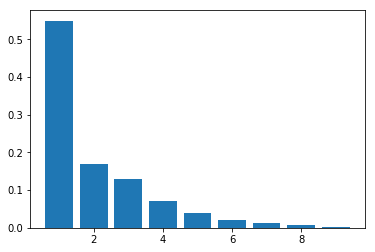

In [28]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [29]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Making a scree plot

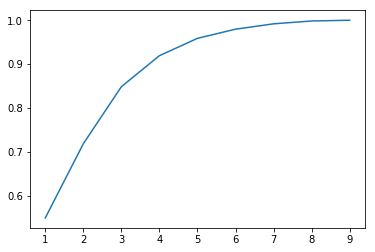

In [30]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 5 components. We can clearly see that over 95% of information lies in the 5th PCA range.

In [31]:
pc2 = PCA(n_components=5, random_state=300)

In [32]:
newdata = pc2.fit_transform(x)

In [33]:
newdata.shape

(165, 5)

### Creating the DataFrame of Components

In [34]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])

In [35]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537
1,0.697563,0.195815,-0.269991,0.233272,0.956481
2,-0.278311,0.637007,1.474718,-0.090239,0.053580
3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399
4,1.547093,-0.524761,0.053186,0.435710,-0.061454


In [36]:
df_final = pd.concat([df, y], axis=1)

In [37]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan
1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania
2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria
3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola
4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda


In [38]:
df_final.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,-1.076580e-17,9.167751e-18,1.749442e-17,-2.287732e-17,1.682156e-17
std,2.229747e+00,1.238032e+00,1.085360e+00,8.002766e-01,5.986734e-01
min,-3.986359e+00,-4.278160e+00,-2.547659e+00,-2.928599e+00,-1.714259e+00
25%,-1.966549e+00,-8.882659e-01,-6.370109e-01,-4.496081e-01,-4.183616e-01
50%,5.796838e-02,-4.293064e-02,-1.952197e-01,2.176550e-02,-3.544878e-02
75%,1.881237e+00,7.164971e-01,4.561956e-01,4.232855e-01,3.757208e-01
max,5.030543e+00,4.444101e+00,3.074154e+00,3.357138e+00,1.889546e+00


## Step 6: Making and Defining Clusters

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3525974776734098
For n_clusters=3, the silhouette score is 0.2674269254693216
For n_clusters=4, the silhouette score is 0.246084695059981
For n_clusters=5, the silhouette score is 0.2475353647008096
For n_clusters=6, the silhouette score is 0.24445844755340693
For n_clusters=7, the silhouette score is 0.2391490375881152
For n_clusters=8, the silhouette score is 0.24705859268043986


In [40]:
# final model with k=3, as the relative difference is major in 3 and 2.
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
kmeans.labels_

array([1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [42]:
df_sa = df_final.copy()

In [43]:
df_sa = df_sa.reset_index()
df_sa.dropna(inplace=True)
df_sa

,index,PC1,PC2,PC3,PC4,PC5,country
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda
5,5,0.290189,2.393170,0.420683,-1.022485,-0.020118,Argentina
6,6,-0.106646,0.406939,0.373176,0.594409,1.335795,Armenia
7,7,2.675973,2.173816,-0.515329,0.357906,-0.602446,Australia
8,8,3.504359,0.258789,-0.701127,-0.417259,-0.221263,Austria
9,9,-0.062844,0.727671,1.173715,-0.427338,-0.112035,Azerbaijan


In [44]:
# assign the label
df_sa['cluster_id'] = kmeans.labels_
df_sa.head()

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2


## Hierarchical Clustering

In [45]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537
1,0.697563,0.195815,-0.269991,0.233272,0.956481
2,-0.278311,0.637007,1.474718,-0.090239,0.053580
3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399
4,1.547093,-0.524761,0.053186,0.435710,-0.061454


In [46]:
df_sa.head()

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2


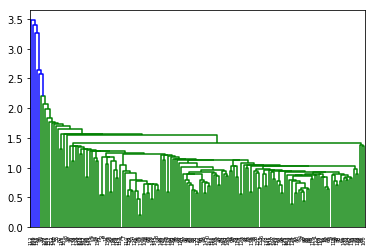

In [47]:
# single linkage
mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

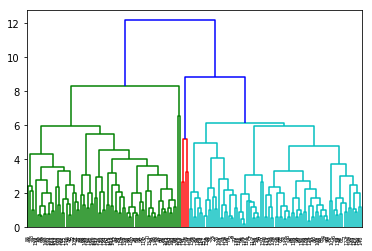

In [48]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# 3 clusters, we can clearly see above that green, red and cyan are the 3 clusters.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [50]:
# assign cluster labels
df_sa['cluster_labels'] = cluster_labels
df_sa.head()

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id,cluster_labels
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1,0
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0,1
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0,1
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1,0
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2,1


In [51]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
data_full = pd.concat([df_sa, data], axis = 1)

In [53]:
data_full.dropna(inplace=True)
data_full.head()

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1.0,0.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1.0,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0.0,1.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2.0,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0.0,1.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3.0,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1.0,0.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4.0,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2.0,1.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [54]:
# As we can see above that cluster_id and cluster_labels need change to int from float.
data_full["index"]= data_full["index"].astype(int) 
data_full["cluster_id"] = data_full["cluster_id"].apply(np.int64)
data_full["cluster_labels"] = data_full["cluster_labels"].apply(np.int64)
data_full.drop(["index"], axis = 1)
data_full

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1,0,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0,1,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0,1,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1,0,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2,1,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,5,0.290189,2.393170,0.420683,-1.022485,-0.020118,Argentina,0,1,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,6,-0.106646,0.406939,0.373176,0.594409,1.335795,Armenia,0,1,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,7,2.675973,2.173816,-0.515329,0.357906,-0.602446,Australia,2,1,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,8,3.504359,0.258789,-0.701127,-0.417259,-0.221263,Austria,2,1,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,9,-0.062844,0.727671,1.173715,-0.427338,-0.112035,Azerbaijan,0,1,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


## Step 7: Performing Exploratory Data Analysis

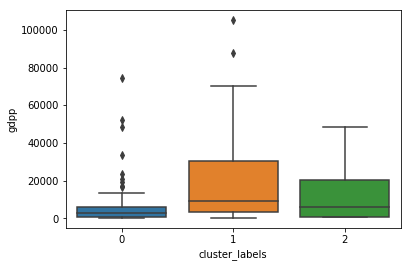

In [55]:
# plot x='cluster_labels', y='gdpp'
sns.boxplot(x='cluster_labels', y='gdpp', data=data_full)

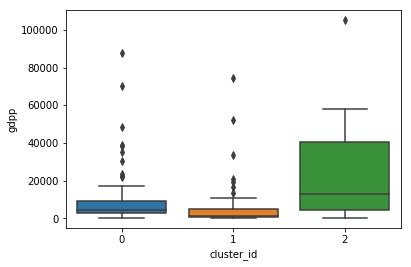

In [56]:
# plot x='cluster_id', y='gdpp'
sns.boxplot(x='cluster_id', y='gdpp', data=data_full)

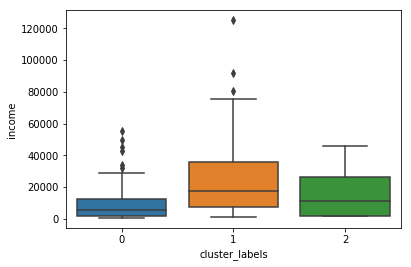

In [57]:
# plot x='cluster_labels', y='income'
sns.boxplot(x='cluster_labels', y='income', data=data_full)

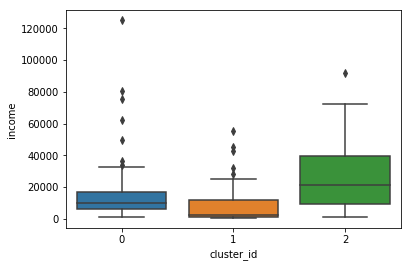

In [58]:
# plot x='cluster_id', y='income'
sns.boxplot(x='cluster_id', y='income', data=data_full)

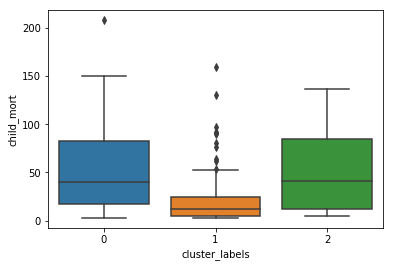

In [59]:
# plot x='cluster_labels', y='child_mort'
sns.boxplot(x='cluster_labels', y='child_mort', data=data_full)

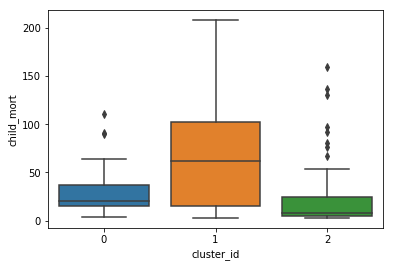

In [60]:
# plot x='cluster_id', y='child_mort'
sns.boxplot(x='cluster_id', y='child_mort', data=data_full)

#### Note:
cluster_labels is derived by Hierarchichal analysis while cluster_id is derived by silhoutte analysis.

From the above plots, we can deduce that the cluster_labels are the better labels in differentiating between the countries than cluster_id. In cluster_labels the data is well distributed and it makes more sense as the outliers are also low in the box plots shown above.

From the above graphs we can also see that the most poor countries with high child mortality and low GDP per person falls in the cluster 0 of cluster_labels.

In [61]:
data_full.head()

,index,PC1,PC2,PC3,PC4,PC5,country,cluster_id,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-3.377190,0.175267,-1.205463,-0.294661,-0.045537,Afghanistan,1,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,0.697563,0.195815,-0.269991,0.233272,0.956481,Albania,0,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,-0.278311,0.637007,1.474718,-0.090239,0.053580,Algeria,0,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,-2.434267,-0.914532,2.284851,-0.324301,-0.926399,Angola,1,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,1.547093,-0.524761,0.053186,0.435710,-0.061454,Antigua and Barbuda,2,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Figure size 432x288 with 0 Axes>

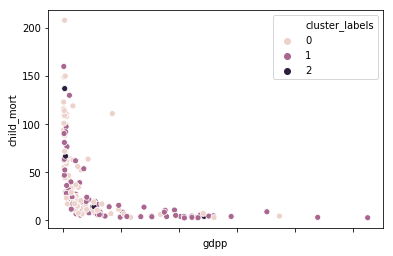

<Figure size 432x288 with 0 Axes>

In [62]:
# scatter plot of gdpp vs child mortality
ax = sns.scatterplot(x="gdpp", y="child_mort", hue="cluster_labels", data = data_full)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

<Figure size 432x288 with 0 Axes>

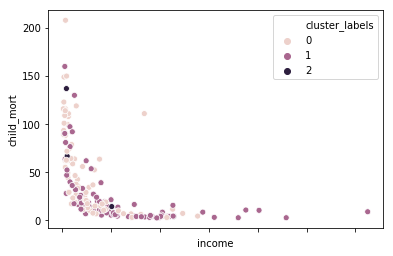

<Figure size 432x288 with 0 Axes>

In [63]:
# scatter plot of income vs child mortality
ax = sns.scatterplot(x="income", y="child_mort", hue="cluster_labels", data = data_full)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

<Figure size 432x288 with 0 Axes>

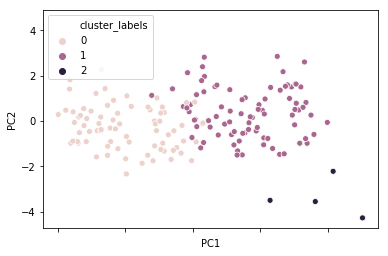

<Figure size 432x288 with 0 Axes>

In [64]:
# scatter plot of PC1 vs PC2
ax = sns.scatterplot(x="PC1", y="PC2", hue="cluster_labels", data = data_full)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

<Figure size 432x288 with 0 Axes>

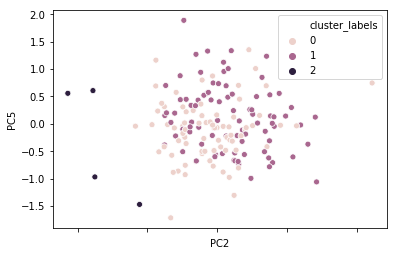

<Figure size 432x288 with 0 Axes>

In [65]:
# scatter plot of PC1 vs PC3
ax = sns.scatterplot(x="PC2", y="PC5", hue="cluster_labels", data = data_full)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

<Figure size 432x288 with 0 Axes>

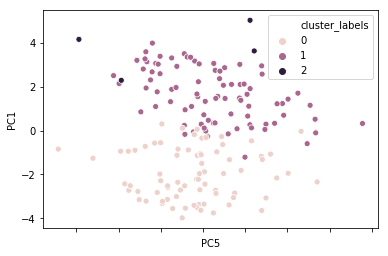

<Figure size 432x288 with 0 Axes>

In [66]:
# scatter plot of PC5 vs PC1
ax = sns.scatterplot(x="PC5", y="PC1", hue="cluster_labels", data = data_full)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

## Step 8: Data Analysis to get the desired result.

In [67]:
data_master = data_full[['country', 'cluster_id', 'cluster_labels', 'child_mort', 'income', 'gdpp']]

In [68]:
data_master.head()

,country,cluster_id,cluster_labels,child_mort,income,gdpp
0,Afghanistan,1,0,90.2,1610,553
1,Albania,0,1,16.6,9930,4090
2,Algeria,0,1,27.3,12900,4460
3,Angola,1,0,119.0,5900,3530
4,Antigua and Barbuda,2,1,10.3,19100,12200


In [69]:
# Countries in cluster 0 w.r.t cluster_labels developed via hierarchical analysis
ctry_ha_clus0 = data_master.loc[data_master['cluster_labels'] == 0]
a = ctry_ha_clus0["country"]
a

0                         Afghanistan
3                              Angola
12                         Bangladesh
17                              Benin
18                             Bhutan
19                            Bolivia
21                           Botswana
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28                           Cameroon
30                         Cape Verde
31           Central African Republic
32                               Chad
36                            Comoros
37                   Congo, Dem. Rep.
38                        Congo, Rep.
40                      Cote d'Ivoire
45                 Dominican Republic
46                            Ecuador
47                              Egypt
49                  Equatorial Guinea
50                            Eritrea
52                               Fiji
55                              Gabon
56                             Gambia
59          

In [70]:
a.value_counts().sum()

76

In [71]:
# Sorting the dataframe on the basis of child mortality to get the countries which may require help.
sort_ctry_ha_clus0 = ctry_ha_clus0.sort_values('child_mort',ascending=False)
df_cm = sort_ctry_ha_clus0.head(10)

In [72]:
# Sorting the dataframe on the basis of income to get the countries which may require help.
sort_ctry_ha_clus0 = ctry_ha_clus0.sort_values('income',ascending=True)
df_i = sort_ctry_ha_clus0.head(10)

In [73]:
# Sorting the dataframe on the basis of gdp per person to get the countries which may require help.
sort_ctry_ha_clus0 = ctry_ha_clus0.sort_values('gdpp',ascending=True)
df_g = sort_ctry_ha_clus0.head(10)

In [74]:
list_cm = df_cm["country"].unique()
list_cm
# Below mentioned is the list of countries that need urgent aid on the basis of child mortality.

array(['Haiti', 'Chad', 'Central African Republic', 'Niger', 'Angola',
       'Burkina Faso', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Benin',
       'Equatorial Guinea'], dtype=object)

In [75]:
list_i = df_i["country"].unique()
list_i
# Below mentioned is the list of countries that need urgent aid on the basis of income.

array(['Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Niger',
       'Central African Republic', 'Mozambique', 'Guinea',
       'Guinea-Bissau', 'Madagascar', 'Comoros'], dtype=object)

In [76]:
list_g = df_g["country"].unique()
list_g
# Below mentioned is the list of countries that need urgent aid on the basis of gdpp.

array(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Madagascar',
       'Mozambique', 'Central African Republic', 'Eritrea',
       'Guinea-Bissau', 'Afghanistan'], dtype=object)

In [77]:
list_final = np.concatenate((list_cm, list_i, list_g))

In [78]:
list_final
# combining the top 10 of all the 3 above mentioned lists.

array(['Haiti', 'Chad', 'Central African Republic', 'Niger', 'Angola',
       'Burkina Faso', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Benin',
       'Equatorial Guinea', 'Congo, Dem. Rep.', 'Liberia', 'Burundi',
       'Niger', 'Central African Republic', 'Mozambique', 'Guinea',
       'Guinea-Bissau', 'Madagascar', 'Comoros', 'Burundi', 'Liberia',
       'Congo, Dem. Rep.', 'Niger', 'Madagascar', 'Mozambique',
       'Central African Republic', 'Eritrea', 'Guinea-Bissau',
       'Afghanistan'], dtype=object)

In [79]:
unique, counts = np.unique(list_final, return_counts=True)

np.asarray((unique, counts)).T
# Getting the frequency counts of the countries which aid as soon as possible. Higher frequecy 
# represents urgency to help.

array([['Afghanistan', 1],
       ['Angola', 1],
       ['Benin', 1],
       ['Burkina Faso', 1],
       ['Burundi', 2],
       ['Central African Republic', 3],
       ['Chad', 1],
       ['Comoros', 1],
       ['Congo, Dem. Rep.', 3],
       ['Equatorial Guinea', 1],
       ['Eritrea', 1],
       ['Guinea', 1],
       ['Guinea-Bissau', 3],
       ['Haiti', 1],
       ['Liberia', 2],
       ['Madagascar', 2],
       ['Mozambique', 2],
       ['Niger', 3]], dtype=object)

In the above array the countries with frequency count 3 are most in the need of aid followed by frequency count of 2. 

### The countries that need urgent aid are:
1. Central African Republic
2. Congo, Dem. Rep.
3. Guinea-Bissau
4. Niger
5. Burundi

Other countries mentioned in the result of the above cell can also be considered for aid but the top 5 are mentioned above in this cell. Overall my approach gave the result of 18 countries, so rest other than my suggestions can also be considered.